# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [47]:
# откройте данные: ваш код здесь
import numpy as np
import pandas as pd

data = pd.read_csv('data\spam_or_not_spam.csv')
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [48]:
# рассчитайте частоты для классов : ваш код здесь
data['label'].value_counts() 

label
0    2500
1     500
Name: count, dtype: int64

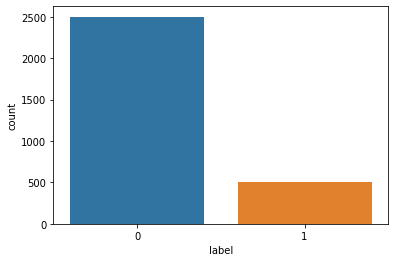

In [49]:
# визуализируйте результат: ваш код здесь
import seaborn as sns
sns.countplot(data=data, x='label');

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [51]:
#ваш код здесь
data['email'] = data['email'].str.replace(r"\W+", " ", regex=True).str.lower()
data['email'] = data['email'].str.replace('\s+', ' ', regex=True).str.strip()
data['email'] = data['email'].str.lower()
data['email'] = data['email'].apply(lambda x: np.NAN if x == '' else x)
data = data.dropna()

Переводим данные в векторный вид:

In [52]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [53]:
#ваш код здесь
X.shape

(2997, 34116)

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [54]:
#ваш код здесь
y = data["label"]

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [55]:
#ваш код здесь
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [56]:
#ваш код здесь
round(y_test.mean(),3)

0.165

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [57]:
#ваш код здесь
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=0.01)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

In [58]:
#ваш код здесь
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB(alpha=0.01)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [59]:
#ваш код здесь
from sklearn import metrics
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_test_pred),3)}")
print(f"Precision: {round(metrics.precision_score(y_test, y_test_pred),3)}")
print(f"Recall: {round(metrics.recall_score(y_test, y_test_pred),3)}")

Accuracy: 0.988
Precision: 1.0
Recall: 0.927


Нарисуйте ROC-кривую:

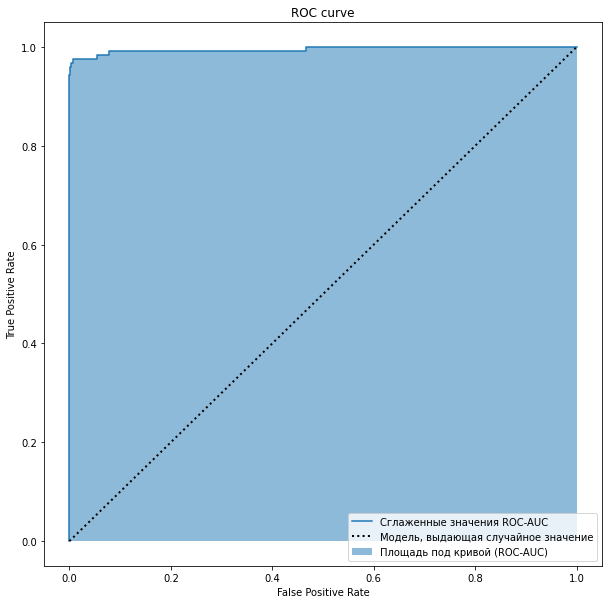

In [60]:
#ваш код здесь
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

pred_proba = clf.predict_proba(X_test)
pred_proba = pred_proba[:, 1]
false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, pred_proba)

# создаём график
plt.figure(figsize=(10, 10))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, 
         label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', 
         label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="pre", 
                 alpha=0.5, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [61]:
#ваш код здесь
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=MultinomialNB(), 
    param_grid={'alpha':list(np.linspace(0.01, 0.1, num=10))}, 
    cv=5, 
    n_jobs = -1
)  
grid_search.fit(X_train, y_train) 
y_test_pred = grid_search.predict(X_test)
print("accuracy на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))
print('precision_score на тестовом наборе: {:.2f}'.format(metrics.precision_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

accuracy на тестовом наборе: 0.99
precision_score на тестовом наборе: 0.99
Наилучшие значения гиперпараметров: {'alpha': 0.09000000000000001}
